In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [2]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


python 3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
sklearn 0.20.1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data())
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(55000, 28, 28)

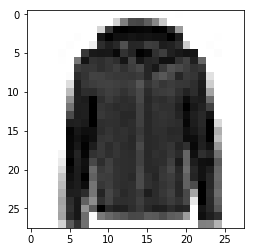

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [18]:
X_valid.shape


(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

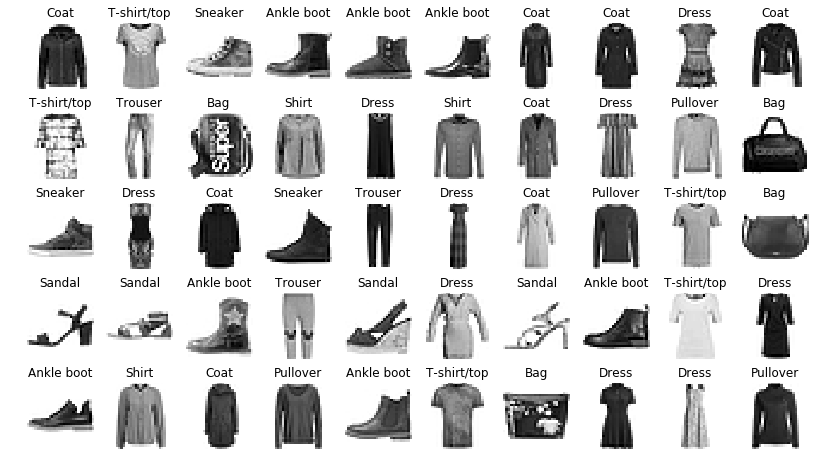

In [19]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")])
model.layers

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 84us/sample - loss: 2.5914 - accuracy: 0.7006 - val_loss: 0.6798 - val_accuracy: 0.7732
Epoch 2/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.6079 - accuracy: 0.7790 - val_loss: 0.5682 - val_accuracy: 0.8074
Epoch 3/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.5147 - accuracy: 0.8143 - val_loss: 0.5445 - val_accuracy: 0.8212
Epoch 4/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4728 - accuracy: 0.8275 - val_loss: 0.5238 - val_accuracy: 0.8292
Epoch 5/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4413 - accuracy: 0.8387 - val_loss: 0.4883 - val_accuracy: 0.8432
Epoch 6/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4209 - accuracy: 0.8444 - val_loss: 0.4685 - val_accuracy: 0.8466
Epoch 7/10
55000/55000 [==============================] -

In [37]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

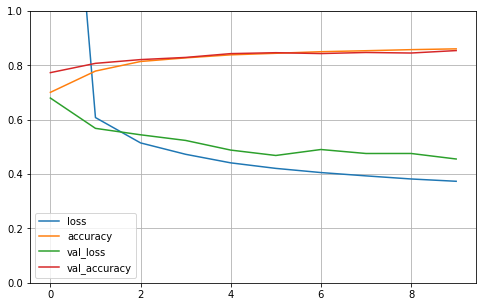

In [38]:
plot_learning_curves(history)

In [39]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3653 - accuracy: 0.8644 - val_loss: 0.4734 - val_accuracy: 0.8458
Epoch 2/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3581 - accuracy: 0.8662 - val_loss: 0.4587 - val_accuracy: 0.8512
Epoch 3/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3506 - accuracy: 0.8695 - val_loss: 0.4513 - val_accuracy: 0.8530
Epoch 4/10
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3448 - accuracy: 0.8715 - val_loss: 0.4397 - val_accuracy: 0.8564
Epoch 5/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3390 - accuracy: 0.8727 - val_loss: 0.4409 - val_accuracy: 0.8558
Epoch 6/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3335 - accuracy: 0.8743 - val_loss: 0.4308 - val_accuracy: 0.8588
Epoch 7/10
55000/55000 [==============================] -

In [40]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.4757 - accuracy: 0.8411


[0.4756945576429367, 0.8411]

In [41]:
n_new = 10
X_new = X_test[:n_new]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.21, 0.02, 0.09, 0.  , 0.55, 0.  , 0.04, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.  , 0.55, 0.  , 0.42, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.  , 0.14, 0.  , 0.84, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [44]:
y_proba.max(axis=1).round(2)

array([0.96, 0.99, 1.  , 1.  , 0.55, 1.  , 0.55, 0.84, 1.  , 1.  ],
      dtype=float32)

In [45]:
k = 3
top_k = np.argsort(-y_proba, axis=1)[:, :k]
top_k

array([[9, 7, 5],
       [2, 6, 4],
       [1, 3, 0],
       [1, 3, 4],
       [6, 2, 0],
       [1, 4, 6],
       [4, 6, 2],
       [6, 4, 2],
       [5, 8, 7],
       [7, 5, 8]])

In [46]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
y_proba[row_indices, top_k].round(2)

array([[0.96, 0.04, 0.  ],
       [0.99, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.55, 0.21, 0.09],
       [1.  , 0.  , 0.  ],
       [0.55, 0.42, 0.03],
       [0.84, 0.14, 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]], dtype=float32)